In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

/var/folders/jx/cmk_mkc16c99zr1hg6mytzkm0000gn/T/ipykernel_96942/2015716346.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=ax,x="reg_method", y="distance_to_mean", data=scores, palette=palette, dodge=False, alpha=.6)


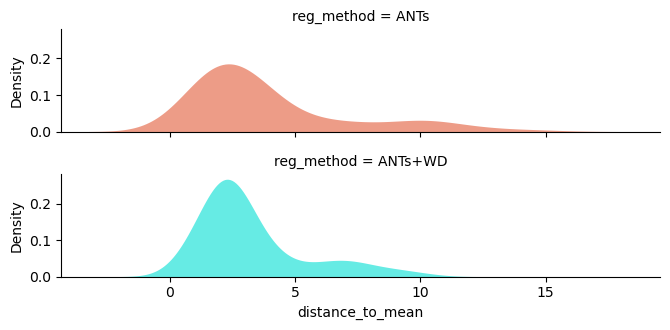

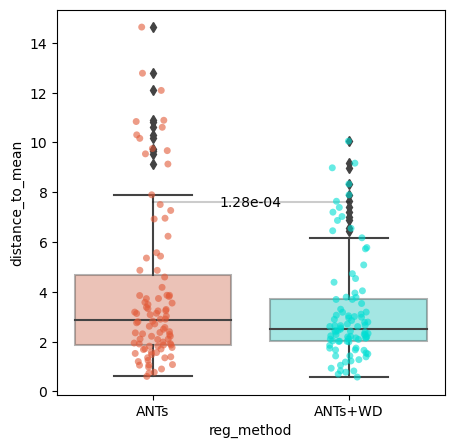

In [2]:
root_path = os.path.dirname(os.path.abspath("Figure-3b.ipynb"))
scores = pd.read_csv(os.path.join(root_path, 'Figure-3b.csv'))
scores.drop(scores.index[scores.reg_method=='EasyReg'], inplace=True)
palette = {"ANTs":"#E25A38", "ANTs+WD":"#00DED3"}
# Density
g = sns.FacetGrid(scores, row="reg_method", height=1.7, aspect=4, hue="reg_method", palette=palette)
g.map(sns.kdeplot, "distance_to_mean", fill=True, alpha=.6, linewidth=0)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig(os.path.join(root_path, 'Figure-3b1.svg'))
# Boxplot
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.boxplot(ax=ax,x="reg_method", y="distance_to_mean", data=scores, palette=palette, boxprops={'alpha': 0.4})
sns.stripplot(ax=ax,x="reg_method", y="distance_to_mean", data=scores, palette=palette, dodge=False, alpha=.6)
# T-test
x1 = scores.loc[scores.reg_method=="ANTs", "distance_to_mean"]
x2 = scores.loc[scores.reg_method=="ANTs+WD", "distance_to_mean"]
res = stats.ttest_rel(x1, x2)
text_kwargs = dict(ha='center', va='center', fontsize=10, color='black')
ax.plot([0,1], [np.mean(ax.get_ylim())]*2, '-k', alpha=0.2)
ax.text(np.mean([0,1]), np.mean(ax.get_ylim()), '%.2e'%res.pvalue, **text_kwargs)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig(os.path.join(root_path, 'Figure-3b2.svg'))